In [1]:
%load_ext autoreload
%autoreload 2

In [83]:
import pandas as pd
import seaborn as sns
from src.data_processing.processors.guppy_processors.experimental_metadata import ExperimentMetaData, MetaDataFactory
from src.data_processing.processors.guppy_processors.config_loader import ConfigLoader
from src.data_processing.processors.guppy_processors.data_preprocessor import BatchPreprocessor
from src.data_processing.processors.guppy_processors.processing_strategies import ProcessingStrategy, BehaviorProcessingStrategy
from src.data_processing.processors.guppy_processors.aggregators import BehaviorAggregationStrategy, aggregate_data


EXPERIMENTAL_CONFIGS = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/conf/config.yaml'
configs = ConfigLoader(EXPERIMENTAL_CONFIGS)
meta_data_factory = MetaDataFactory(configs)

In [28]:
configs.data_path

PosixPath('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data')

In [29]:
behavior_strategy_params={
    'config_key': 'behavioral_events',
    'time_window': (-10, 20),
    'events': (('cue', 'lick'), ('cue', 'encoder'))

}
meta_data_factory = MetaDataFactory(configs)
behavior_strategy = BehaviorProcessingStrategy(**behavior_strategy_params)
batch_preprocessor = BatchPreprocessor(meta_data_factory, behavior_strategy)


In [30]:
behavior_strategy.time_window

(-10, 20)

In [35]:
for p in batch_preprocessor.metadata_factory.all_meta_data:
    print(p.main_path.name)

3816-240206-113517
3813_1-240208-124657
3816-240202-112115
3814-240201-121503
5079-240206-160118
3819-240205-154853
3814-240208-105439
3634-240206-093505
3813_1-240201-141343
5079-240207-161746
3816-240208-113424
3819-240203-161920
3634-240202-093346
3819-240206-152437
3819-240208-151530
3819-240207-153831
3816-240207-114057
3813_1-240202-124052
3820-240206-144358
5079-240205-162840
5079-240208-155139
3634-240207-094238
117-240202-131936
3813_1-240203-135427
5079-240203-165529
3814-240202-104647
3818-240207-142223
117-240208-132242
3818-240205-142828
5079-240202-162437
3812-240205-123051
3634-240208-093922
3813_1-240205-130907
3818-240201-153349
3634-240205-100102
3812-240201-133407
3820-240203-154231
117-240207-133526
3814-240207-110004
3634-240203-103643
3814-240205-110941
3820-240201-161313
3812-240207-122113
3814-240206-105512
117-240203-143003
117-240206-133054
3820-240205-150829
3814-240203-120104
3813_1-240207-130015
117-240205-134916
117-240201-145326
3816-240205-114934
3812-24

In [76]:
batch_preprocessor.process_data(num_processors=8)


In [77]:
files = configs.data_path.rglob('*processed_data.parquet')

In [78]:
from src.data_processing.processors.guppy_processors.aggregators import BehaviorAggregationStrategy, aggregate_data
aggregate_data(configs, BehaviorAggregationStrategy)

In [79]:
df = pd.read_parquet('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/aggregated_data/aggregated_behavior_data.parquet')


In [80]:
df

,lick_aligned_to_cue,encoder_aligned_to_cue,subject,user,date,time,time_recorded
0,0.172414,4.137931,3816.0,User,2024-02-06,-10.000000,2024-02-09 11:35:21
1,0.172414,1.724138,3816.0,User,2024-02-06,-9.805195,2024-02-09 11:35:21
2,0.172414,3.620690,3816.0,User,2024-02-06,-9.610390,2024-02-09 11:35:21
3,0.344828,4.482759,3816.0,User,2024-02-06,-9.415584,2024-02-09 11:35:21
4,0.000000,1.379310,3816.0,User,2024-02-06,-9.220779,2024-02-09 11:35:21
...,...,...,...,...,...,...,...
150,0.000000,4.500000,3819.0,User,2024-02-01,19.220779,2024-02-09 16:51:00
151,0.000000,4.500000,3819.0,User,2024-02-01,19.415584,2024-02-09 16:51:00
152,0.000000,8.166667,3819.0,User,2024-02-01,19.610390,2024-02-09 16:51:00
153,0.000000,8.833333,3819.0,User,2024-02-01,19.805195,2024-02-09 16:51:00


In [88]:
latest_date = df.date.max()
latest_date

Timestamp('2024-02-08 00:00:00')

<Axes: xlabel='time', ylabel='encoder_aligned_to_cue'>

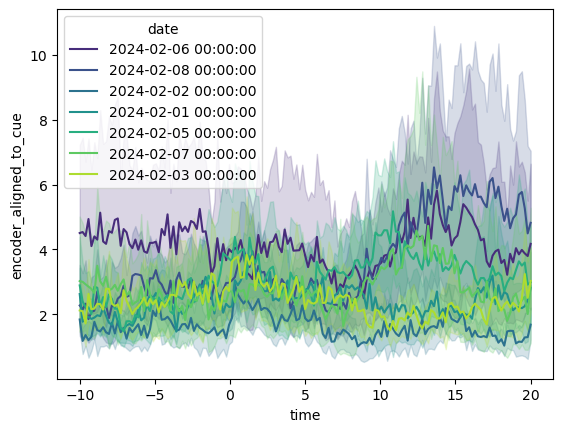

In [95]:
import matplotlib.pyplot as plt
# data = df.query("date==@latest_date")
sns.lineplot(data=df, x='time', y='encoder_aligned_to_cue', hue='date', palette='viridis')